## Bike Sharing Assignment


#### Build a multiple linear regression model for the prediction of demand for shared bikes. 


- they want to understand the factors `affecting` the `demand` for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands.


#### Model the demand for shared bikes with the available independent variables.

- In the dataset that some of the variables like `'weathersit'` and `'season'` have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary).
- weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 

**These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why).So, it is advisable to convert such feature values into categorical string values before proceeding with model building.**


***The column `'yr'` with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values. so it might not be a value-add to the model.***
- But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it.


***There are three columns named 'casual', 'registered', and 'cnt'.
The variable 'casual' indicates the number casual users who have made a rental.
The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day.***
- Finally, the `'cnt'` variable indicates the total number of bike rentals, including both `casual` and `registered`.
#### The model should be built taking this` 'cnt'` as the `target variable`.####

In [1]:
# for mathematical operations
import numpy as np 

# for dataframe operations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# full display of columns and rows
pd.set_option('display.max_column',None,'display.max_colwidth',1000,"display.max_rows",10000)

# lets select  a background style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 7)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#### Read dataset

In [2]:
# lets import the data
data = pd.read_csv("day.csv")

# changing the names of the columns inside the data
data.columns = ["Index", "Date", "Season", "Year", "Month", "Holiday", "Weekday",
                        "Workingday", "Weathersite", "Temp", "feelTemp", "Humidity", "Windspeed", "Casual", "Registered", "Count"]
data.head()

,Index,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weathersite,Temp,feelTemp,Humidity,Windspeed,Casual,Registered,Count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspect the dataframe's columns, shapes, variable types etc

In [3]:
data.columns

Index(['Index', 'Date', 'Season', 'Year', 'Month', 'Holiday', 'Weekday',
       'Workingday', 'Weathersite', 'Temp', 'feelTemp', 'Humidity',
       'Windspeed', 'Casual', 'Registered', 'Count'],
      dtype='object')

In [4]:
data.shape

(730, 16)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
Index          730 non-null int64
Date           730 non-null object
Season         730 non-null int64
Year           730 non-null int64
Month          730 non-null int64
Holiday        730 non-null int64
Weekday        730 non-null int64
Workingday     730 non-null int64
Weathersite    730 non-null int64
Temp           730 non-null float64
feelTemp       730 non-null float64
Humidity       730 non-null float64
Windspeed      730 non-null float64
Casual         730 non-null int64
Registered     730 non-null int64
Count          730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


In [6]:
data.dtypes

Index            int64
Date            object
Season           int64
Year             int64
Month            int64
Holiday          int64
Weekday          int64
Workingday       int64
Weathersite      int64
Temp           float64
feelTemp       float64
Humidity       float64
Windspeed      float64
Casual           int64
Registered       int64
Count            int64
dtype: object

In [7]:
data.describe()

,Index,Season,Year,Month,Holiday,Weekday,Workingday,Weathersite,Temp,feelTemp,Humidity,Windspeed,Casual,Registered,Count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# count column-wise null
data.isnull().sum()

Index          0
Date           0
Season         0
Year           0
Month          0
Holiday        0
Weekday        0
Workingday     0
Weathersite    0
Temp           0
feelTemp       0
Humidity       0
Windspeed      0
Casual         0
Registered     0
Count          0
dtype: int64

In [9]:
# count row-wise null
data.isnull().sum(axis=1)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
30     0
31     0
32     0
33     0
34     0
35     0
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     0
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     0
80     0
81     0
82     0
83     0
84     0
85     0
86     0
87     0
88     0
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    0
108    0
109    0
110    0
1

- No missing values, we can proceed

### Data Visualization

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

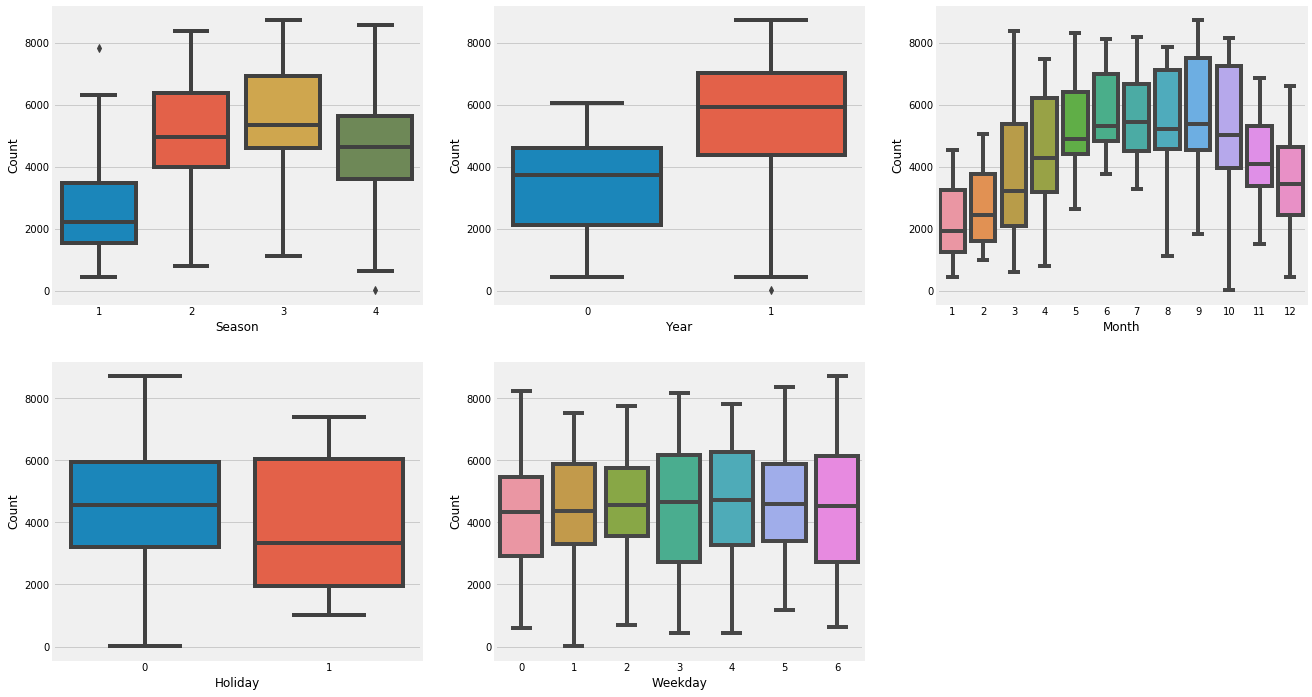

In [10]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Season', y = 'Count', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'Year', y = 'Count', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'Month', y = 'Count', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'Holiday', y = 'Count', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'Weekday', y = 'Count', data = data)

plt.show()

- The `box plots` indicate that `more` bicycles are rent during `Holiday` in `fall` season, month between `June to September` and mostly in year `2019` is grows up

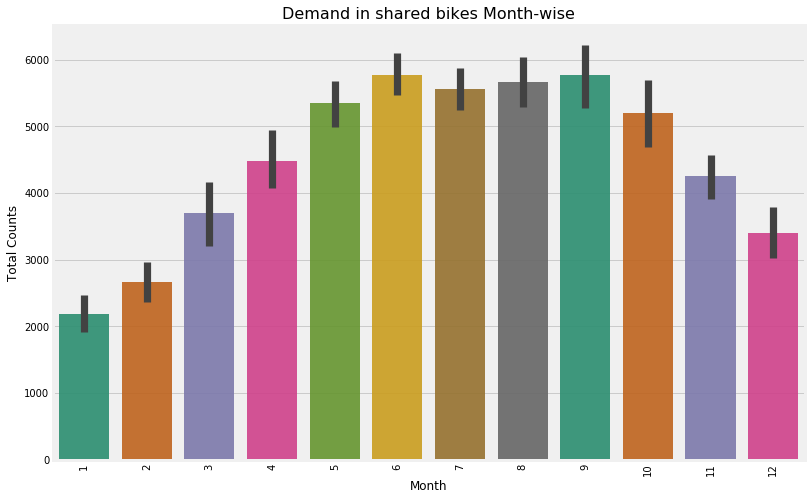

In [11]:
# lets plot the data
plt.rcParams['figure.figsize'] = (12, 8)
sns.barplot(y = data.Count, x = data.Month, alpha=0.9, palette = 'Dark2')
plt.xticks(rotation='vertical')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Counts', fontsize=12)
plt.title("Demand in shared bikes Month-wise", fontsize=16)
plt.show()

- we can see, Demands were `more` in `June to September` (5000 to 6000) and `less` in `January` (2000 to 3000)

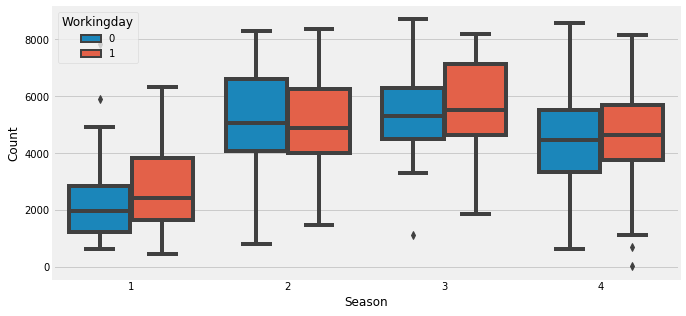

In [12]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Season', y = 'Count', hue = 'Workingday', data = data)
plt.show()

- On `Workingday`, demand is `more` in 1:spring, 3:fall and 4:winter but get `less` in 2:summer
- On `Weekend or Holiday`, demand is `more` in 2:summer but get `less` in 1:spring, 3:fall and 4:winter 

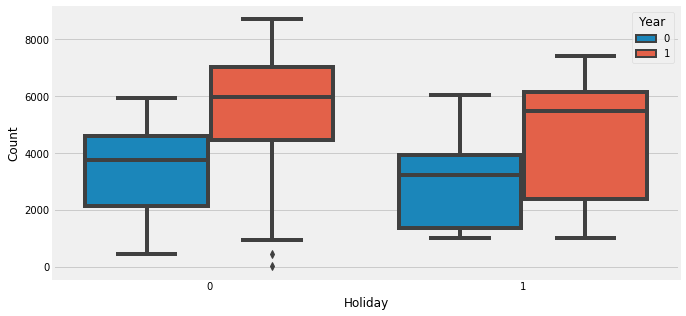

In [13]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Holiday', y = 'Count', hue = 'Year', data = data)
plt.show()

- In case of `Holiday`, clearly demand began to `grow` in Year 1:`2019` and also more in `0:Holiday` than `1:Workingday or non-Holiday` 

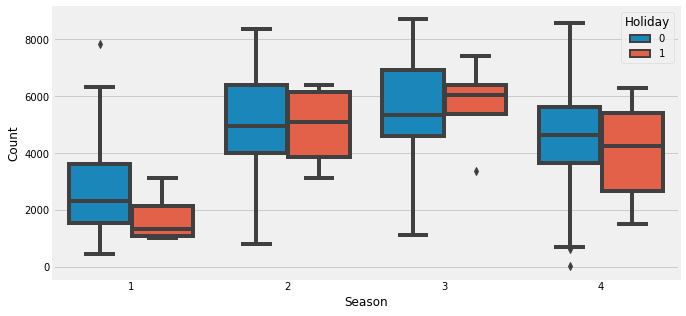

In [14]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Season', y = 'Count', hue = 'Holiday', data = data)
plt.show()

- In case of `Season`, mostly demand were more in `2:summer and 3:fall` and less in `1:spring`

Number of funding per month in decreasing order(Top 10)
 201908    31
201907    31
201903    31
201803    31
201805    31
201807    31
201808    31
201810    31
201901    31
201812    31
Name: yearmonth, dtype: int64


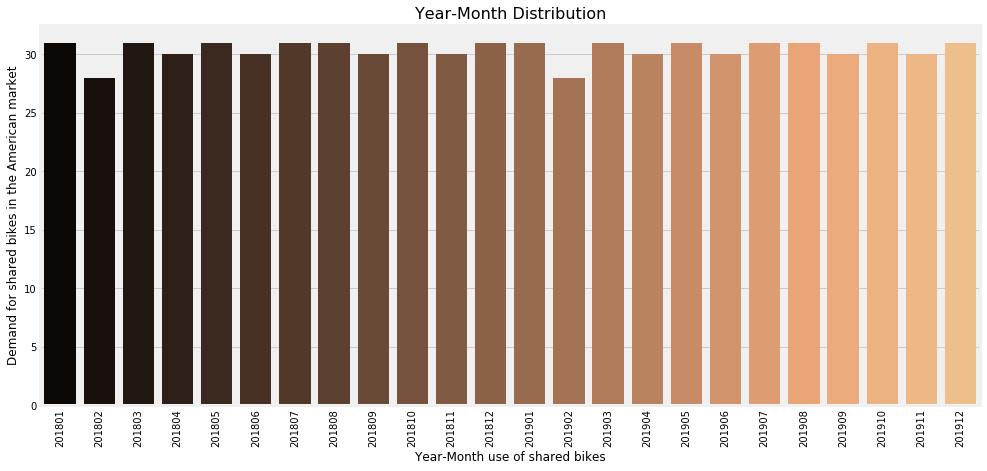

In [15]:
# converting them into a Datetime object
data["yearmonth"] = (pd.to_datetime(data['Date'],
         format='%d-%m-%Y').dt.year*100)+(pd.to_datetime(data['Date'],format='%d-%m-%Y').dt.month)


temp = data['yearmonth'].value_counts().sort_values(ascending = False).head(10)

print("Number of funding per month in decreasing order(Top 10)\n",temp)
year_month = data['yearmonth'].value_counts()


# lets plot the data
plt.rcParams['figure.figsize'] = (15, 7)
sns.barplot(year_month.index, year_month.values, palette = 'copper')
plt.xticks(rotation = 90)
plt.xlabel('Year-Month use of shared bikes', fontsize=12)
plt.ylabel('Demand for shared bikes in the American market', fontsize=12)
plt.title("Year-Month Distribution", fontsize=16)
plt.show()

- Demand for shared bikes shows `high` throughout the year 

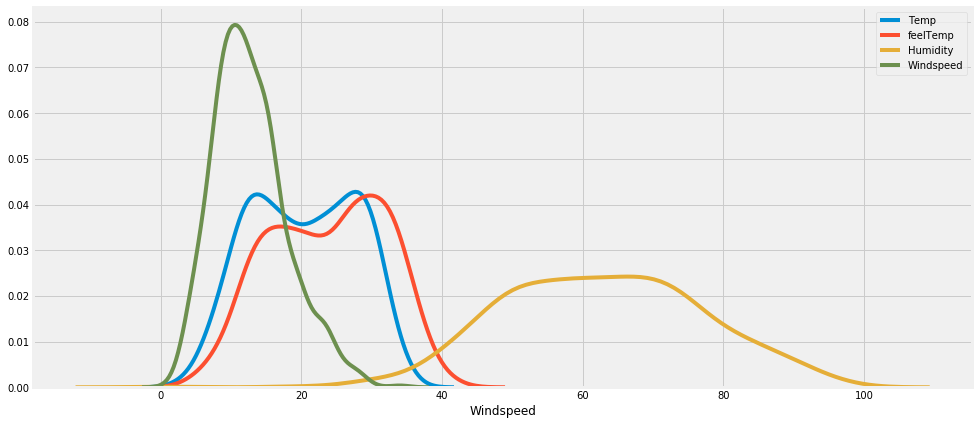

In [16]:
sns.distplot(data['Temp'], hist = False, label='Temp')
sns.distplot(data['feelTemp'], hist = False, label='feelTemp')
sns.distplot(data['Humidity'], hist = False, label='Humidity')
sns.distplot(data['Windspeed'], hist = False, label='Windspeed')
plt.show()

- Definately `Windspeed` will be high because of riding bikes. And `Humidity` at that time is little bit low than `normal temperature`, which is very good to ride the bike

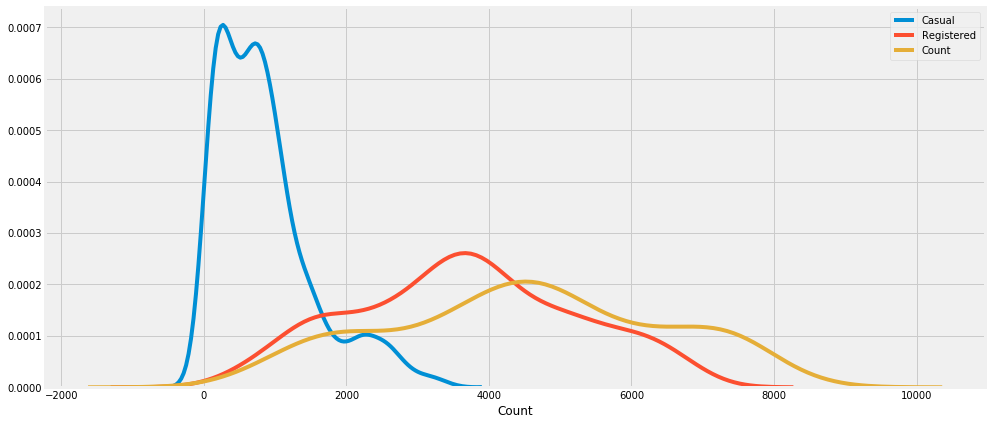

In [17]:
# I wanted to analyse continuous column with respect to the target column
sns.distplot(data['Casual'], hist = False, label='Casual')
sns.distplot(data['Registered'], hist = False, label='Registered')
sns.distplot(data['Count'], hist = False, label='Count')
plt.show()

- `Casual` were more into shared bikes than `Registered`

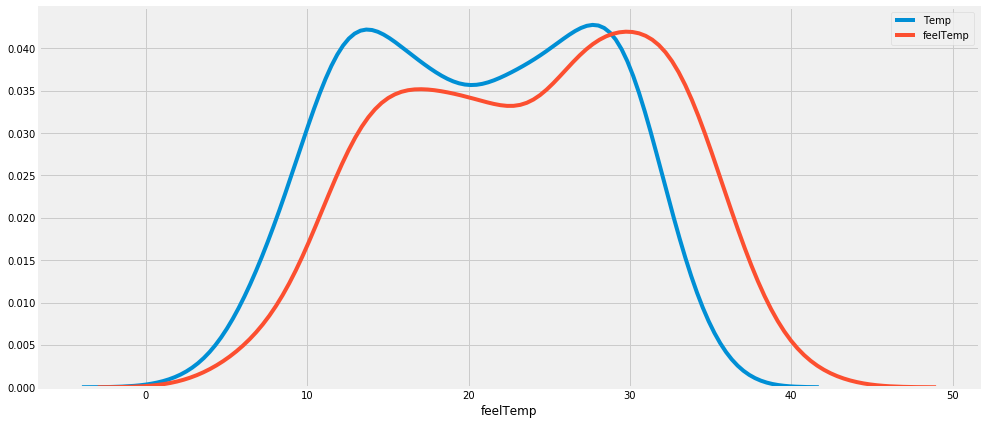

In [18]:
sns.distplot(data['Temp'], hist = False, label='Temp')
sns.distplot(data['feelTemp'], hist = False, label='feelTemp')
plt.show()

- `feelTemp` and `Temp`(normal temperature) were almost same

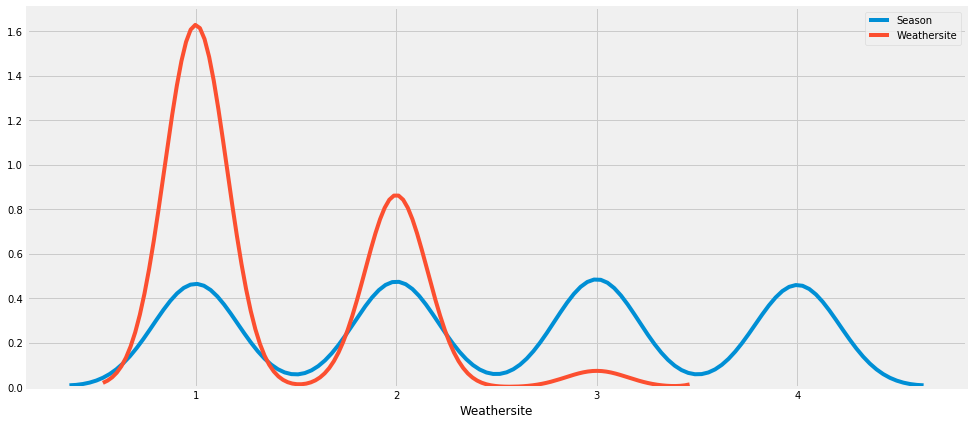

In [19]:
sns.distplot(data['Season'], hist = False, label='Season')
sns.distplot(data['Weathersite'], hist = False, label='Weathersite')
plt.show()

- This infer, that `most` of the demand in shared bikes was in `Spring Season` because it is clear, few clouds and partly cloudy.
- Then `second most` demand in `Winter Season` because of Mist + Cloudy, Mist + Broken clouds, mist + few clouds
- But demand were `very less` in Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

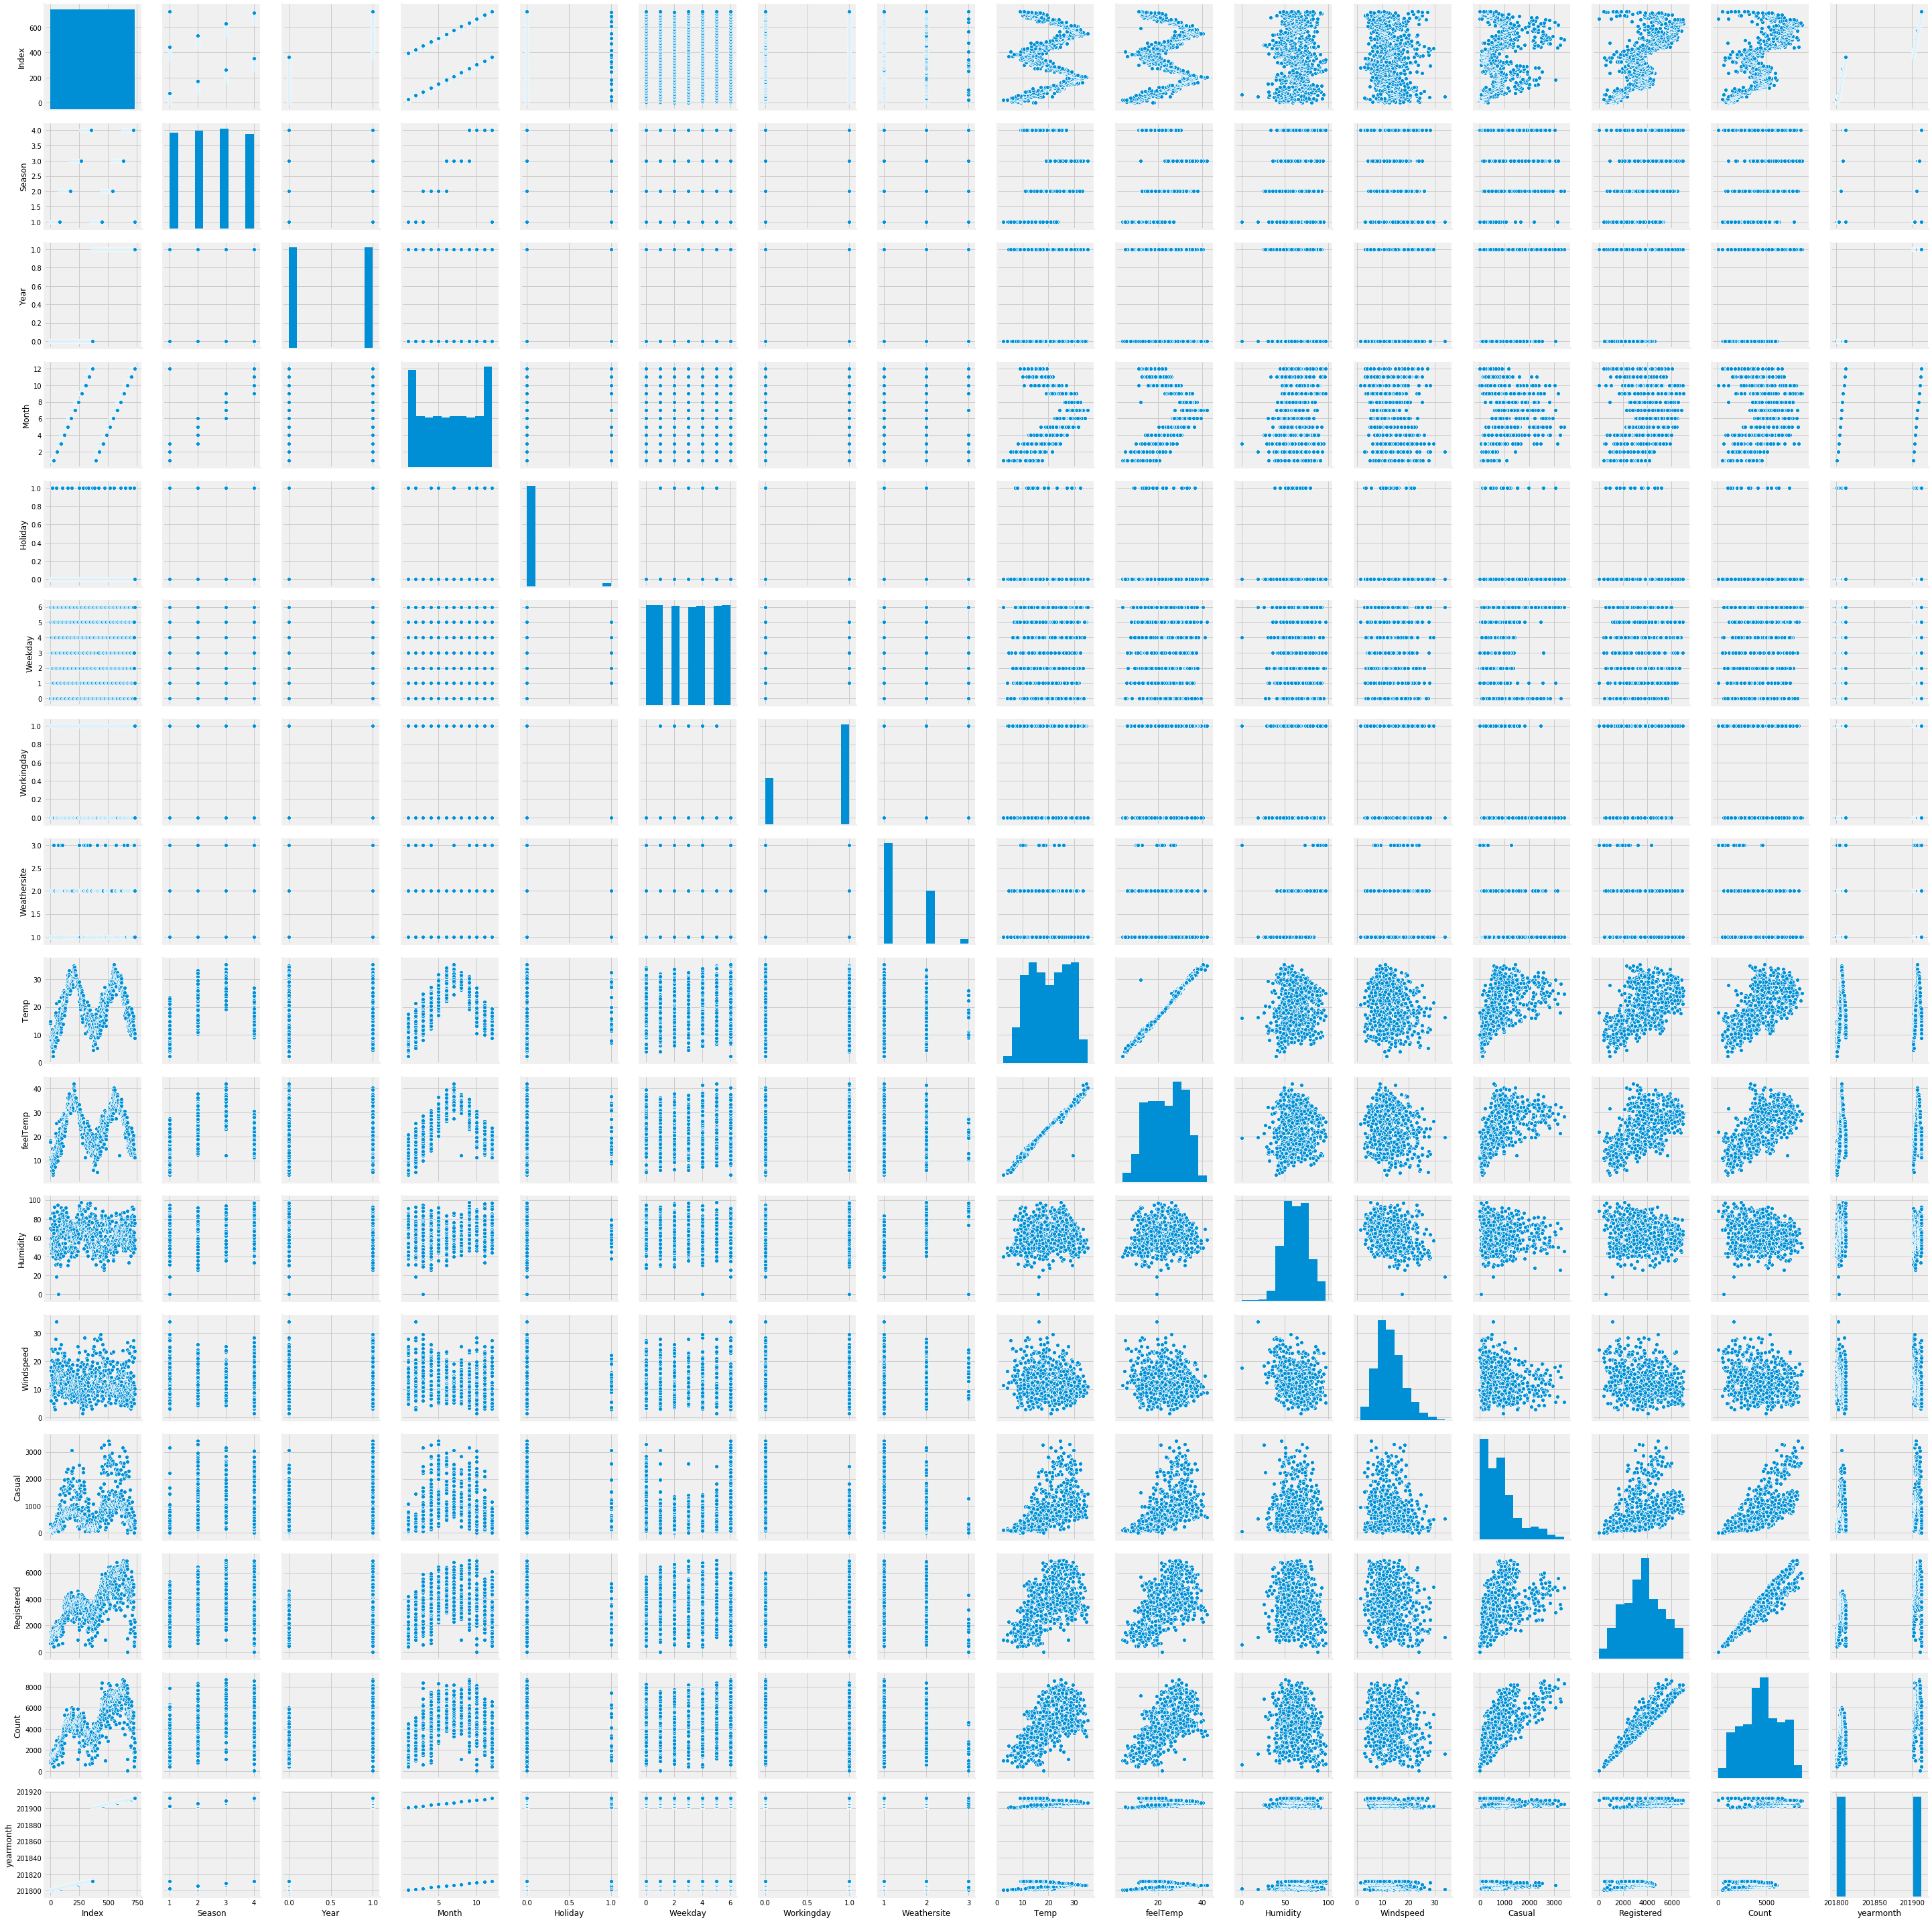

In [20]:
sns.pairplot(data)
plt.show()

- By pairplot we can able to see the pattern of highest correlation with the target variable 

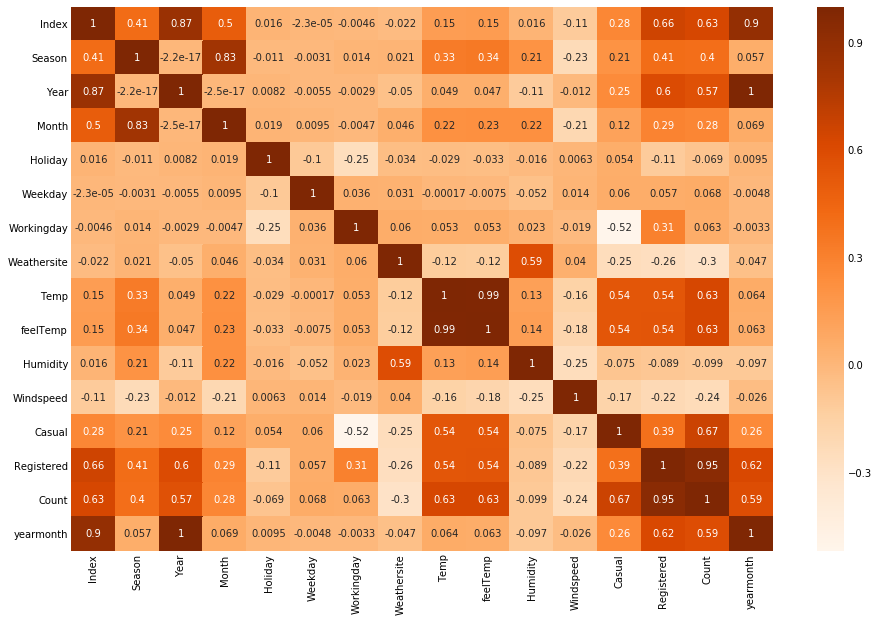

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (14, 10))
sns.heatmap(data.corr(), annot = True, cmap="Oranges")
plt.show()

- `feelTemp and Temp = 63%` is the highest correlation with `target variable(Count)`. 
- `Casual` and `registered` contain `direct information` about the `bike sharing (count)` which is to predict (data leakage). Therefore they are not considered in the feature set. The variables "temp" and "atemp" are correlated.

As we might have noticed, `Count` seems to the correlated to `feelTemp` the most. Let's see a pairplot for `Count` vs `Registered`.

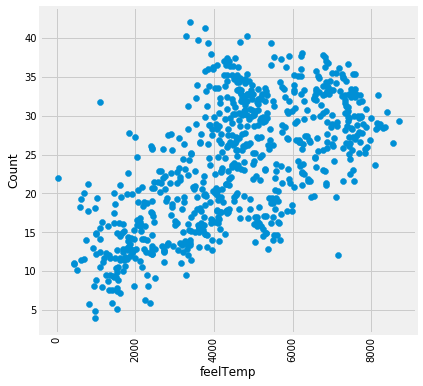

In [22]:
plt.figure(figsize=[6,6])
plt.scatter(data.Count, data.feelTemp)

plt.xticks(rotation = 90)
plt.xlabel('feelTemp', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()

- From visualization we can infer: 
          Categorical features:"Season","Year","Month","Holiday",Weekday","Workingday","Weathersite" 
          Continuous features: "Humidity","Windspeed","Temp","feelTemp","Casual","Registered","Count"

### Data Preparationm

In [23]:
data.head()

,Index,Date,Season,Year,Month,Holiday,Weekday,Workingday,Weathersite,Temp,feelTemp,Humidity,Windspeed,Casual,Registered,Count,yearmonth
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,201801
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,201801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,201801
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,201801
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,201801


In [24]:
# so we will drop
data = data.drop('Index',axis=1)
data = data.drop('Date',axis=1)
data = data.drop('Temp',axis=1)
data = data.drop('Casual',axis=1)
data = data.drop('Registered',axis=1)
data = data.drop('yearmonth',axis=1)

- By droping `Index`, `Date` and `yearmonth` will not affect the model building, though it will smoothen the process and accuracy
- But `Casual` and `Registered` which is total rental bikes(Count) which we need to `predict`. So, we can say Casual and Registered are target variable 
- Variable `Temp` is drop and `feelTemp` is considered, although both are same. So, we can choose any 1 of them 

In [25]:
# List of Season variables to map
varlist =  ['Season']

# Defining the map function
def binary_map(x):
    return x.map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Applying the function to the data list
data[varlist] = data[varlist].apply(binary_map)

In [26]:
# List of Month variables to map
varlist =  ['Month']

# Defining the map function
def binary_map(x):
    return x.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Applying the function to the data list
data[varlist] = data[varlist].apply(binary_map)

In [27]:
# List of Weekday variables to map
varlist =  ['Weekday']

# Defining the map function
def binary_map(x):
    return x.map({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'})

# Applying the function to the data list
data[varlist] = data[varlist].apply(binary_map)

In [28]:
# List of Weathersite variables to map
varlist =  ['Weathersite']

# Defining the map function
def binary_map(x):
    return x.map({1: 'Clear', 2: 'Mist+Cloudy', 3: 'Light Snow', 4: 'Heavy Rain'})

# Applying the function to the data list
data[varlist] = data[varlist].apply(binary_map)

In [29]:
data.head()

,Season,Year,Month,Holiday,Weekday,Workingday,Weathersite,feelTemp,Humidity,Windspeed,Count
0,spring,0,Jan,0,Sat,0,Mist+Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist+Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600


#### Dummy Variables
- for all categorical features(Season, Month, Weekday, Weathersite)

In [30]:
# Get the dummy variables for the feature 'Season' and store it in a new variable - 'status'
status = pd.get_dummies(data['Season'])

In [31]:
# Check what the dataset 'status' looks like
status

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
5,0,1,0,0
6,0,1,0,0
7,0,1,0,0
8,0,1,0,0
9,0,1,0,0


Now, we don't need four columns. We can drop the `fall` column, as the type of `Season` can be identified with just the last three columns where — 
- `1000` will correspond to `fall`
- `0100` will correspond to `spring`
- `0010` will correspond to `summer`
- `0001` will correspond to `winter`

In [32]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(data['Season'], drop_first = True)

In [33]:
# Add the results to the original data dataframe
data = pd.concat([data, status], axis = 1)

In [34]:
# Drop 'Season' as we have created the dummies for it
data.drop(['Season'], axis = 1, inplace = True)

In [35]:
# Now let's see the head of our dataframe.
data.head()

,Year,Month,Holiday,Weekday,Workingday,Weathersite,feelTemp,Humidity,Windspeed,Count,spring,summer,winter
0,0,Jan,0,Sat,0,Mist+Cloudy,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sun,0,Mist+Cloudy,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600,1,0,0


In [36]:
# Get the dummy variables for the feature 'Month' and store it in a new variable - 'status'
status1 = pd.get_dummies(data['Month'])

In [37]:
status1

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,0,1,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,0,0


Now, we don't need four columns. We can drop the `Jan` column, as the type of `Month` can be identified with just the last three columns where — 
- `100000000000` will correspond to `Jan`
- `010000000000` will correspond to `Feb`
- `001000000000` will correspond to `Mar`
- `000100000000` will correspond to `Apr`
- `000010000000` will correspond to `May`
- `000001000000` will correspond to `Jun`
- `000000100000` will correspond to `Jul`
- `000000010000` will correspond to `Aug`
- `000000001000` will correspond to `Sep`
- `000000000100` will correspond to `Oct`
- `000000000010` will correspond to `Nov`
- `000000000001` will correspond to `Dec`

In [38]:
# Let's drop the first column from status df using 'drop_first = True'
status1 = pd.get_dummies(data['Month'], drop_first = True)

In [39]:
# Add the results to the original data dataframe
data = pd.concat([data, status1], axis = 1)

In [40]:
# Drop 'Month' as we have created the dummies for it
data.drop(['Month'], axis = 1, inplace = True)

In [41]:
data.head()

,Year,Holiday,Weekday,Workingday,Weathersite,feelTemp,Humidity,Windspeed,Count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,Sat,0,Mist+Cloudy,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,Sun,0,Mist+Cloudy,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,Mon,1,Clear,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,Tue,1,Clear,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,Wed,1,Clear,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0


In [42]:
# Get the dummy variables for the feature 'Weekday' and store it in a new variable - 'status'
status2 = pd.get_dummies(data['Weekday'])

In [43]:
status2

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0
6,1,0,0,0,0,0,0
7,0,0,1,0,0,0,0
8,0,0,0,1,0,0,0
9,0,1,0,0,0,0,0


Now, we don't need four columns. We can drop the `Sun` column, as the type of `Weekday` can be identified with just the last three columns where — 
- `1000000` will correspond to `Sun`
- `0100000` will correspond to `Mon`
- `0010000` will correspond to `Tue`
- `0001000` will correspond to `Wed`
- `0000100` will correspond to `Thu`
- `0000010` will correspond to `Fri`
- `0000001` will correspond to `Sat`

In [44]:
# Let's drop the first column from status df using 'drop_first = True'
status2 = pd.get_dummies(data['Weekday'], drop_first = True)

In [45]:
# Add the results to the original data dataframe
data = pd.concat([data, status2], axis = 1)

In [46]:
# Drop 'Weekday' as we have created the dummies for it
data.drop(['Weekday'], axis = 1, inplace = True)

In [47]:
data.head()

,Year,Holiday,Workingday,Weathersite,feelTemp,Humidity,Windspeed,Count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,Mist+Cloudy,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,Mist+Cloudy,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,Clear,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,Clear,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,Clear,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
# Get the dummy variables for the feature 'Weathersite' and store it in a new variable - 'status'
status3 = pd.get_dummies(data['Weathersite'])

In [49]:
status3

,Clear,Light Snow,Mist+Cloudy
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0
6,0,0,1
7,0,0,1
8,1,0,0
9,1,0,0


Now, we don't need four columns. We can drop the `Clear` column, as the type of `Weathersite` can be identified with just the last three columns where — 
- `1000` will correspond to `Clear`
- `0100` will correspond to `Mist+Cloudy`
- `0010` will correspond to `Light Snow`
- `0001` will correspond to `Heavy Rain`

In [50]:
# Let's drop the first column from status df using 'drop_first = True'
status3 = pd.get_dummies(data['Weathersite'], drop_first = True)

In [51]:
# Add the results to the original data dataframe
data = pd.concat([data, status3], axis = 1)

In [52]:
# Drop 'Weathersite' as we have created the dummies for it
data.drop(['Weathersite'], axis = 1, inplace = True)

In [53]:
data.head()

,Year,Holiday,Workingday,feelTemp,Humidity,Windspeed,Count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist+Cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Splitting the Data into Training and Testing Sets

In [54]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Rescaling the Features into MinMax Scaler

In [55]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [56]:
# Apply scaler() to all the columns except the 'M-F' and 'dummy' variables
num_vars = ['feelTemp','Humidity','Windspeed','Count']

In [57]:
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [58]:
df_train.head()

,Year,Holiday,Workingday,feelTemp,Humidity,Windspeed,Count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist+Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [59]:
df_train.describe()

,Year,Holiday,Workingday,feelTemp,Humidity,Windspeed,Count,spring,summer,winter,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist+Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Dividing into X and Y sets for the model building

In [60]:
y_train = df_train.pop('Count')
x_train = df_train

#### Building a linear model

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
lm=LinearRegression()
lm.fit(x_train,y_train)    # 1st we fit model then we pass lm to RFE

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [63]:
rfe = RFE(lm,15)     # we will run rfe with 15 variable
rfe = rfe.fit(x_train,y_train)

In [64]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('Holiday', True, 1),
 ('Workingday', False, 2),
 ('feelTemp', True, 1),
 ('Humidity', True, 1),
 ('Windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 7),
 ('Mar', False, 14),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 13),
 ('Light Snow', True, 1),
 ('Mist+Cloudy', True, 1)]

In [65]:
# to look at column which RFE select 
col=x_train.columns[rfe.support_]
col

Index(['Year', 'Holiday', 'feelTemp', 'Humidity', 'Windspeed', 'spring',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Sat', 'Light Snow',
       'Mist+Cloudy'],
      dtype='object')

In [66]:
# to look at column which RFE not select 
x_train.columns[~rfe.support_]

Index(['Workingday', 'summer', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct', 'Mon',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [67]:
x_train_rfe = x_train[col]

In [68]:
import statsmodels.api as sm
x_train_rfe = sm.add_constant(x_train_rfe)
lm=sm.OLS(y_train,x_train_rfe).fit()

In [69]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.67e-187
Time:                        20:58:00   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3662      0.032     11.425      

- P-value of `Sat` is high(`0.104`) can be dropped 


#### Dropping the variable and updating the model

In [70]:
x_train_rfe.columns

Index(['const', 'Year', 'Holiday', 'feelTemp', 'Humidity', 'Windspeed',
       'spring', 'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Sat',
       'Light Snow', 'Mist+Cloudy'],
      dtype='object')

In [71]:
x_train_rfe=x_train_rfe.drop(['Sat'],axis=1)

In [72]:
import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train_rfe)
lm1=sm.OLS(y_train,x_train_rfe).fit()

In [73]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.58e-187
Time:                        20:58:00   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3704      0.032     11.578      

- Still `P-value` some of them have which need to be treated. But `Adj.R-squared` remain `same`.

###### Checking VIF

`Variance Inflation Factor` or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

##### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [74]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,63.33
3,feelTemp,3.39
6,spring,2.69
7,winter,2.30
4,Humidity,1.91
11,Nov,1.70
9,Jan,1.65
14,Mist+Cloudy,1.57
8,Dec,1.44
10,Jul,1.30


- We generally want a `VIF` that is `less than 5`. So there are clearly some variables we need to drop.
- `'Nov'` P-value is high. So we `drop`

In [76]:
x_train_rfe=x_train_rfe.drop(['Nov'],axis=1)

In [77]:
import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train_rfe)
lm2=sm.OLS(y_train,x_train_rfe).fit()

In [78]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     198.4
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          6.66e-187
Time:                        20:58:00   Log-Likelihood:                 503.74
No. Observations:                 510   AIC:                            -979.5
Df Residuals:                     496   BIC:                            -920.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3571      0.032     11.225      

- `Dec` p-value is `0.066`. So we `drop`

In [79]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.83
3,feelTemp,3.26
6,spring,2.67
4,Humidity,1.91
7,winter,1.80
9,Jan,1.63
13,Mist+Cloudy,1.56
10,Jul,1.30
12,Light Snow,1.26
8,Dec,1.24


In [80]:
x_train_rfe=x_train_rfe.drop(['Dec'],axis=1)

In [81]:
import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train_rfe)
lm3=sm.OLS(y_train,x_train_rfe).fit()

In [82]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     213.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.40e-187
Time:                        20:58:00   Log-Likelihood:                 502.00
No. Observations:                 510   AIC:                            -978.0
Df Residuals:                     497   BIC:                            -923.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3507      0.032     11.063      

- `Jan` p-value is `0.031`. We will `drop` it.

In [83]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,61.08
3,feelTemp,3.11
6,spring,2.66
4,Humidity,1.89
7,winter,1.74
8,Jan,1.56
12,Mist+Cloudy,1.56
9,Jul,1.29
11,Light Snow,1.25
5,Windspeed,1.20


In [84]:
x_train_rfe=x_train_rfe.drop(['Jan'],axis=1)

In [85]:
import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train_rfe)
lm4=sm.OLS(y_train,x_train_rfe).fit()

In [86]:
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.57e-187
Time:                        20:58:00   Log-Likelihood:                 499.61
No. Observations:                 510   AIC:                            -975.2
Df Residuals:                     498   BIC:                            -924.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3404      0.031     10.822      

In [87]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.70
3,feelTemp,2.91
6,spring,2.49
4,Humidity,1.89
7,winter,1.71
11,Mist+Cloudy,1.56
8,Jul,1.28
10,Light Snow,1.24
5,Windspeed,1.18
9,Sep,1.11


- we will drop `'Sep'` variable 

In [88]:
x_train_rfe=x_train_rfe.drop(['Sep'],axis=1)

In [89]:
import statsmodels.api as sm
x_train_rfe=sm.add_constant(x_train_rfe)
lm5=sm.OLS(y_train,x_train_rfe).fit()

In [90]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.9
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          2.79e-185
Time:                        20:58:00   Log-Likelihood:                 491.43
No. Observations:                 510   AIC:                            -960.9
Df Residuals:                     499   BIC:                            -914.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3351      0.032     10.504      

In [91]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.60
3,feelTemp,2.86
6,spring,2.49
4,Humidity,1.88
7,winter,1.71
10,Mist+Cloudy,1.56
8,Jul,1.24
9,Light Snow,1.24
5,Windspeed,1.17
1,Year,1.03


In [92]:
x_train_rfe.columns

Index(['const', 'Year', 'Holiday', 'feelTemp', 'Humidity', 'Windspeed',
       'spring', 'winter', 'Jul', 'Light Snow', 'Mist+Cloudy'],
      dtype='object')

- Now as we can see, the `VIFs` and `p-values` both are within an acceptable range. So we go ahead and make our predictions using this model only.

#### Residual Analysis of the train data

So, now to check if the `error terms` are also `normally distributed` (which is infact, one of the major assumptions of linear regression), let us plot the `histogram` of the error terms and see what it looks like.

In [93]:
x_train_rfe.shape

(510, 11)

In [94]:
y_train_Count= lm5.predict(x_train_rfe)

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

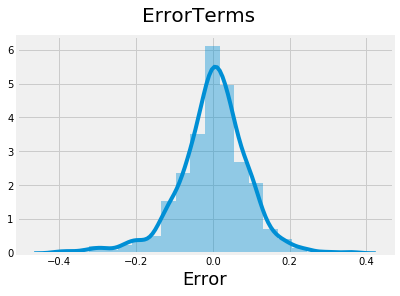

In [96]:
fig=plt.figure()
sns.distplot((y_train-y_train_Count),bins=20)
fig.suptitle('ErrorTerms',fontsize=20)
plt.xlabel('Error',fontsize=18)
plt.show()

####  Making Predictions Using the Final Model

Now that we have `fitted` the model and checked the `normality of error terms`, it's time to go ahead and make `predictions` using the final, i.e. Fifth model.

##### Applying the scaling on the test sets

In [97]:
num_vars=['feelTemp','Humidity','Windspeed','Count']
df_test[num_vars]=scaler.transform(df_test[num_vars])

##### Dividing into x_test and y_test

In [98]:
y_test=df_test.pop('Count')
x_test=df_test

In [99]:
x_test_new = x_test[x_train.columns]

In [100]:
x_test_new=sm.add_constant(x_test)

In [101]:
# dropping variables from X_test_new

x_test_new = x_test_new.drop(["Workingday","summer","Aug","Feb","Jun","Mar","May","Oct","Mon","Sun","Thu","Tue","Wed","Sat",'Nov','Dec','Jan','Sep'], axis = 1)

In [102]:
x_test_new.head()

,const,Year,Holiday,feelTemp,Humidity,Windspeed,spring,winter,Jul,Light Snow,Mist+Cloudy
184,1.0,0,1,0.769660,0.657364,0.084219,0,0,1,0,1
535,1.0,1,0,0.842587,0.610133,0.153728,0,0,0,0,0
299,1.0,0,0,0.496145,0.837699,0.334206,0,1,0,0,1
221,1.0,0,0,0.795343,0.437098,0.339570,0,0,0,0,0
152,1.0,0,0,0.741471,0.314298,0.537414,0,0,0,0,0


In [103]:
import statsmodels.api as sm
x_test_new=sm.add_constant(x_test_new)
lm5=sm.OLS(y_test,x_test_new).fit()

In [104]:
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     100.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           4.67e-74
Time:                        20:58:01   Log-Likelihood:                 216.22
No. Observations:                 219   AIC:                            -410.4
Df Residuals:                     208   BIC:                            -373.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3551      0.053      6.703      

- In test, R-squared = `0.829` and Adj. R-squared = `0.821` is `achievable`

In [105]:
x_test_new.shape

(219, 11)

In [106]:
# Making predictions using the Fifth model

y_pred_new = lm5.predict(x_test_new)

### Model Evaluation


- Plot the graph for `actual(y_test)` versus `predicted(y_pred_new)` values.

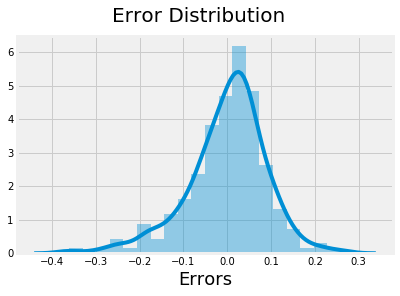

In [107]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred_new), bins = 20)
fig.suptitle('Error Distribution', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)                         
plt.show()

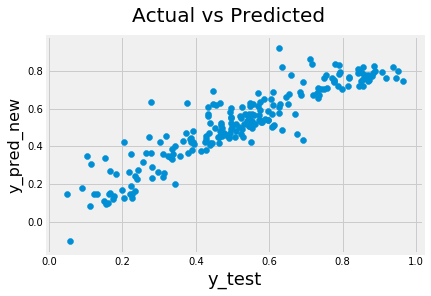

In [108]:
# Plotting actual and predicted to understand the spread
fig=plt.figure()
plt.scatter(y_test,y_pred_new)
fig.suptitle('Actual vs Predicted',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('y_pred_new',fontsize=16)
plt.show()

In [109]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_new)
rmse = np.sqrt(mse)
print("Root Mean Squared Error :", rmse)
r2 = r2_score(y_test, y_pred_new)
print("R2 Score :", r2)

Root Mean Squared Error : 0.09015205647774759
R2 Score : 0.8288818823452633


- By `R-square` we can say that, `(x)independent` variable is able to explain `83%` of `(y)dependent` variable and `RMSE` is `low (0.09015 or 9%)` which is `good`


- We get to know that, 
                     - On Training: Adj.R-square = 0.827 and R-square = 0.831
                     - On Testing: Adj.R-square = 0.821 and R-square = 0.829
                                   R2 Score = 0.828
- Which conclude Model is `very good fit` and can able to `explain better`. 


Variables:$'Year','Holiday','feelTemp','Humidity','Windspeed','spring','winter', 'Jul', 'Light Snow', 'Mist+Cloudy'$ 
- This `10` variables are `highly significant` in predicting the demand for shared bikes and `83%` well enough to describe the bike demands.